In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
fipe_2022 = pd.read_csv('fipe_2022.csv')
fipe_cars = pd.read_csv('fipe_cars.csv')

In [4]:
fipe_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [5]:
fipe_cars.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


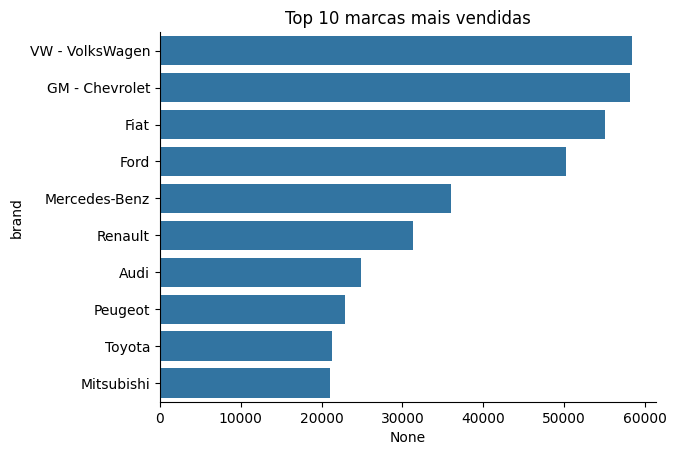

In [22]:
marcas = fipe_cars.groupby('brand')
top10 = marcas.size().sort_values(ascending=False).iloc[:10]
sns.barplot(
    x=top10,
    y=top10.index
    )
sns.despine()
plt.title('Top 10 marcas mais vendidas')
plt.show()

In [7]:
vw = fipe_cars[fipe_cars['brand'] == 'VW - VolksWagen']

query01 = vw['model'].str.contains('Polo')
query02 = vw['year_model'] > 2019
query03 = vw['gear'] == 'manual'

polo = vw[query01 & query02 & query03].value_counts(subset='year_model').sort_index()
polo

year_model
2020    75
2021    81
2022    92
2023    50
Name: count, dtype: int64

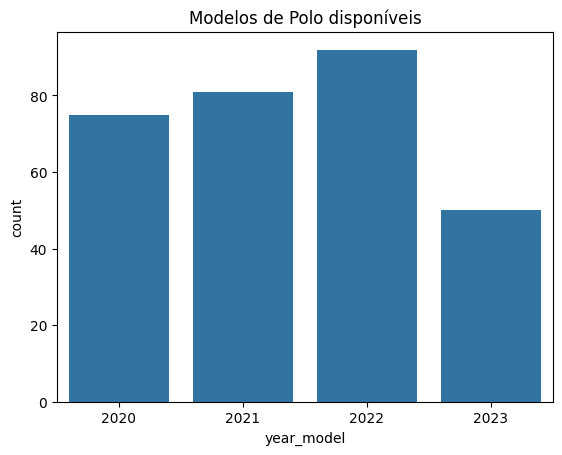

In [8]:
sns.barplot(polo)
plt.title('Modelos de Polo disponíveis')
plt.show()

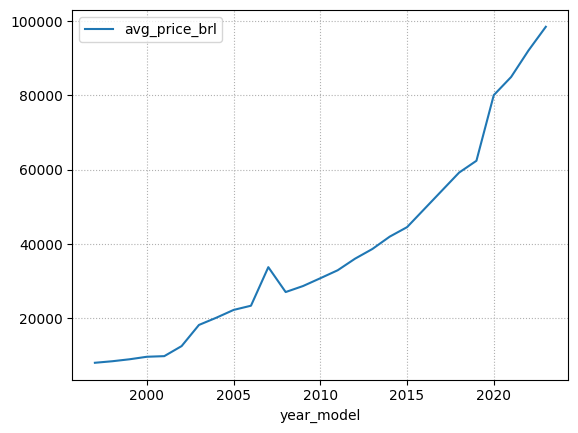

In [ ]:
query01 = vw['model'].str.contains('Polo')
query02 = vw['gear'] == 'manual'

polo = vw[query01 & query02]
polo_avg = polo.groupby('year_model').agg({'avg_price_brl':'mean'})

sns.lineplot(
    polo_avg,
    )
plt.grid(ls=':')
